In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

line_width = 3
font_size = 18

#set to True or False for viewing the plots of Exp-WN or Standard-WN
exp_WN = False
if exp_WN:
    dir = '../lin-sep/Exp-WN'
else:
    dir = '../lin-sep/Standard-WN'

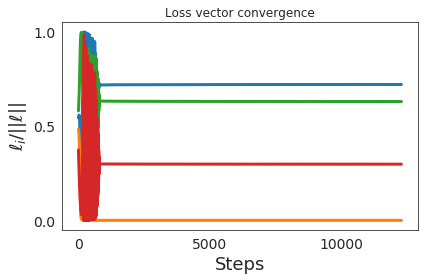

In [10]:
loss_vec_dir = np.load(dir + '/loss_vec_dir.npz')
loss_vec_dir = loss_vec_dir['loss_vec_dir']
for i in range(loss_vec_dir.shape[0]):
    plt.plot(np.arange(loss_vec_dir.shape[1]), loss_vec_dir[i], label = 'data point ' + str(i), linewidth = line_width)
plt.xlabel('Steps', fontsize=font_size)
plt.ylabel(r'$\ell_i/||\ell||$', fontsize=font_size)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=4)
plt.title('Loss vector convergence')
plt.tight_layout()
plt.show()

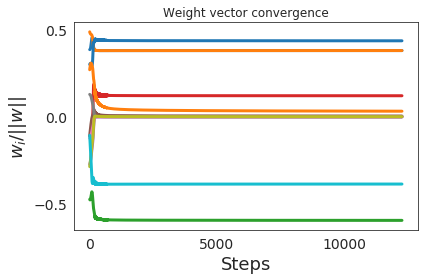

In [11]:
if exp_WN:
    indices = [5, 7, 8]
else:
    indices = [5, 6, 8]
lengths = [2, 2, 8]
corr_norms = []
for i in range(len(indices)):
    temp_1 = np.load(dir + '/w_norm_' + str(indices[i]) + '.npz')
    corr_norms.append(temp_1['w_norm'])

w_dir = []
for i in range(len(indices)):
    temp_1 = np.load(dir + '/w_dir_' + str(indices[i]) + '.npz')
    w_dir.append(temp_1['w_dir'])

temp_arr = None
for i in range(len(indices)):
    if i==0:
        temp_arr = np.reshape(np.array(corr_norms[i]), (1,-1))
    else:
        temp_arr = np.concatenate([temp_arr, np.reshape(np.array(corr_norms[i]), (1,-1))], axis=0)

temp_arr = temp_arr/np.linalg.norm(temp_arr, axis=0, keepdims=True)
fin_w_dir = None
for i in range(len(corr_norms[0])):
    temp_dir = None
    for j in range(len(indices)):
        if j==0:
            temp_dir = np.reshape(temp_arr[j, i]*w_dir[j][:,i], (-1,1))
        else:
            temp_dir = np.concatenate([temp_dir, np.reshape(temp_arr[j, i]*w_dir[j][:,i], (-1,1))], axis=0)

    if i==0:
        fin_w_dir = temp_dir.copy()
    else:
        fin_w_dir = np.concatenate([fin_w_dir, temp_dir.copy()], axis=1)

curr_sum = 0
curr_index = 0
for i in range(fin_w_dir.shape[0]):
    plt.plot(np.arange(fin_w_dir.shape[1]), fin_w_dir[i], label=r'$w_' + str(indices[curr_index]) + '$[' + str(curr_sum) + ']', linewidth = line_width)
    curr_sum += 1
    if curr_sum == lengths[curr_index]:
        curr_sum = 0
        curr_index += 1

plt.xlabel('Steps', fontsize = font_size)
plt.ylabel(r'$w_i/||w||$', fontsize = font_size)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=4)
plt.title('Weight vector convergence')
plt.tight_layout()
plt.show()

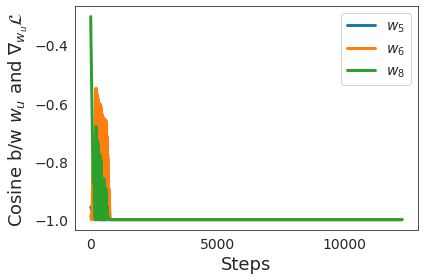

In [12]:
for i in range(len(indices)):
    temp_1 = np.load(dir + '/w_norm_' + str(indices[i]) + '.npz')['w_grad_angle']
    plt.plot(np.arange(temp_1.shape[0]), temp_1, label = r'$w_' + str(indices[i]) + '$', linewidth = line_width)
plt.xlabel('Steps', fontsize = font_size)
plt.ylabel(r'Cosine b/w $w_u$ and $\nabla_{w_u} \mathcal{L}$', fontsize = font_size)
plt.legend(prop = {'size': 14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=4)
plt.tight_layout()
plt.show()

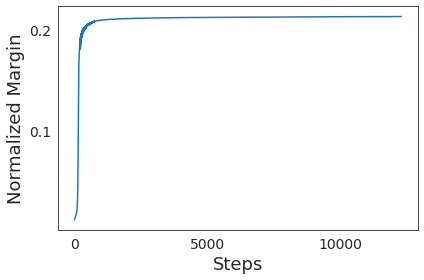

In [13]:
temp_1 = np.load(dir + '/param_margin.npz')['param_margin']
plt.plot(np.arange(temp_1.shape[0]), temp_1)
plt.xlabel('Steps', fontsize = font_size)
plt.ylabel('Normalized Margin', fontsize = font_size)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=4)
plt.tight_layout()
plt.show()

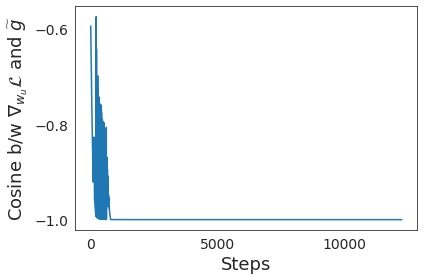

In [14]:
temp_1 = np.load(dir + '/l_tilde_grad_angle.npz')['l_tilde_grad_angle']
plt.plot(np.arange(temp_1.shape[0]), temp_1)
plt.xlabel('Steps', fontsize = font_size)
plt.ylabel(r'Cosine b/w $\nabla_{w_u} \mathcal{L}$ and $\widetilde g$', fontsize = font_size)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=4)
plt.show()

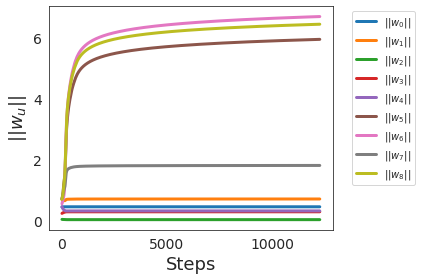

In [15]:
indices = 9
for i in range(indices):
    name = dir + '/w_norm_' + str(i) + '.npz'
    norm = np.load(name)['w_norm']
    plt.plot(np.arange(norm.shape[0]), norm, linewidth=line_width, label=r'$||w_' + str(i) + '||$')

plt.xlabel('Steps', fontsize=font_size)
plt.ylabel(r'$||w_u||$', fontsize=font_size)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop = {'size': 10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=4)
plt.tight_layout()
plt.show()

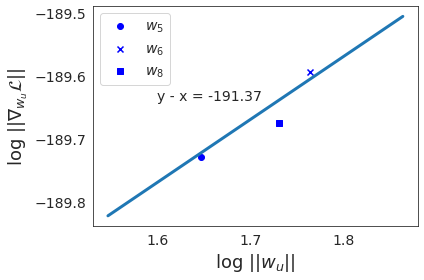

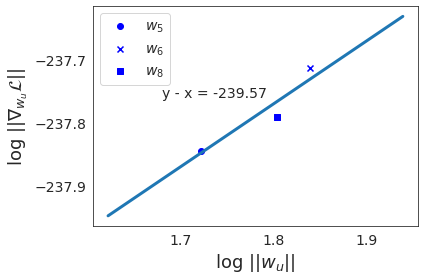

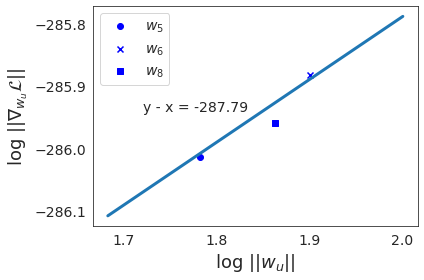

In [16]:
file_pref = 'w_norm_'
if exp_WN:
    indices = np.array([5, 7, 8])
else:
    indices = np.array([5, 6, 8])
losses = [200, 250, 300]

with open(dir + '/train_loss.txt', 'r') as f:
    train_loss = np.array([float(x) for x in f.readlines()])

train_loss = train_loss[1:]
fin_ind = []
for loss in losses:
    fin_ind.append(np.argmin(np.abs(train_loss + loss)))

if exp_WN:
    vals = [-188.67, -236.32, -284.21]
    x_vals = [1.7, 1.8, 1.85]
else:
    vals = [-191.37, -239.57, -287.79]
    x_vals = [1.6, 1.68, 1.72]

markers = ['o', 'x', 's']
fin_values = np.zeros((len(indices), len(losses)))
for j, ind in enumerate(fin_ind):
    w_norm_arr = []
    for i, index in enumerate(indices):
        f = np.load(dir + '/' + file_pref + str(index) + '.npz')
        w_norm = f['w_norm']
        grad_norm = f['grad_norm']
        if exp_WN:
            fin_values[i, j] = -0.966*losses[j] + np.log(grad_norm[ind]) + np.log(w_norm[ind])
        else:
            fin_values[i, j] = -0.966 * losses[j] + np.log(grad_norm[ind]) - np.log(w_norm[ind])
        plt.scatter(np.log(w_norm[ind]), -0.966*losses[j] + np.log(grad_norm[ind]), c='blue', marker = markers[i], label=r'$w_' + str(indices[i]) +'$')
        w_norm_arr.append(np.log(w_norm[ind]))
    x = np.linspace(min(w_norm_arr)-0.1, max(w_norm_arr) + 0.1, 100)
    if exp_WN:
        y = vals[j] - x
    else:
        y = vals[j] + x
    plt.plot(x, y, linewidth = line_width)
    if exp_WN:
        plt.text(x_vals[j], vals[j] - x_vals[j] + 0.05, 'x + y = ' + str(vals[j]), fontsize=14)
    else:
        plt.text(x_vals[j], vals[j] + x_vals[j] + 0.13, 'y - x = ' + str(vals[j]), fontsize=14)
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(prop={'size': 14})
    plt.xlabel(r'log $|| w_u ||$', fontsize=font_size)
    plt.ylabel(r'log $|| \nabla_{w_u} \mathcal{L} ||$', fontsize=font_size)
    plt.tight_layout()
    plt.show()

#print(fin_values)